In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
#Είδα ότι δεν είναι Normalized τα δεδομένα οπότε τα έκανα δεν ξέρω αν είναι σίγουρα καλύτερα έτσι θα δοκιμάσω
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

(60000, 28, 28)


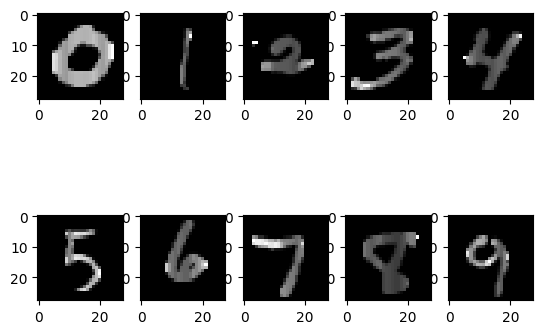

In [4]:
#Βλέπουμε όλες τις εικόνες και το μεγεθός τους 28*28 άρα είναι 784 Pixel και δεν παίζουν όλα τα pixel ρόλο αφού συνήθως όλοι γράφουν στο κέντρο της εικόνας οπότε θα δείξω παρακάτω
for i in range(10):
  indices = np.where(y_train == i)[0]
  plt.subplot(2, 5, i + 1)
  random_index = np.random.choice(indices)
  plt.imshow(x_train[random_index], cmap='gray')

print(x_train.shape)





In [5]:

#Υπάρχουν με μαθηματική βεβαιότητα 67 νεκρά Pixel πολύ πιθανόν και αυτά με την πολύ μικρή διακύμανση να είναι για να βγούν από το μοντέλο μας
important_pixels = np.var(x_train, axis=0)
not_important_pixels = np.sum(important_pixels == 0)
print("Number of pixels with high variance", len(important_pixels))
print("Number of pixels with 0 variance", not_important_pixels)

Number of pixels with high variance 28
Number of pixels with 0 variance 67


In [6]:
#Νομίζω έιναι είδη np arrays απλά δεν ήμουν σίγουρος
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
#Θέλει flattening αφού δεν είναι CNN
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

print(x_train_flat.shape)

(60000, 784)


Accuracy: 0.9616 (96.16%)
Accuracy: 0.9538 (95.38%)
Accuracy: 0.9421 (94.21%)
Accuracy: 0.9063 (90.63%)


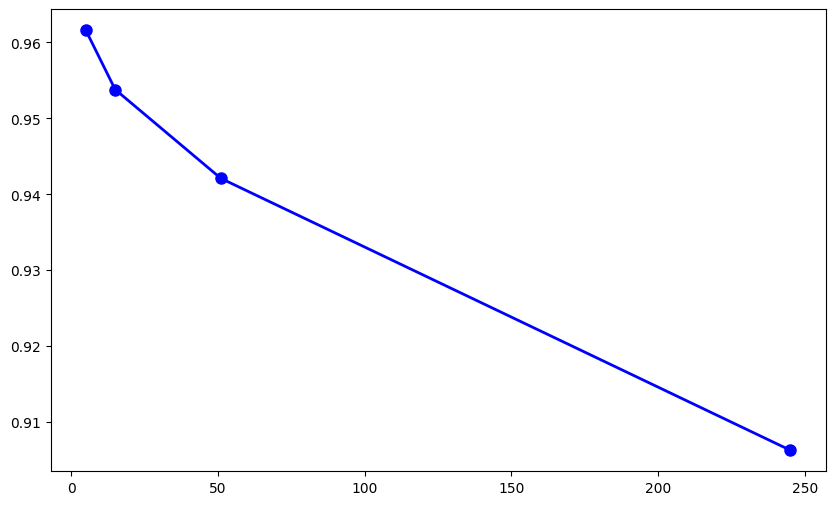

In [8]:
k=[5,15,51,245]
acc_val = []

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_flat, y_train)
  accuracy = knn.score(x_test_flat, y_test)
  acc_val.append(accuracy)
  print(f"Accuracy: {accuracy:.4f} ({(accuracy*100):.2f}%)")
plt.figure(figsize=(10, 6))
plt.plot(k, acc_val, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)



In [10]:
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(x_train_flat, y_train)

KNeighborsClassifier()

In [11]:
img = Image.open('MNIST.png').convert('L')
img_array = np.array(img)
img_ready = img_array / 255.0
img_flat = img_ready.reshape(1, 784)
prediction = best_knn.predict(img_flat)
print(f"ο αριθμός είναι: {prediction[0]}")

ο αριθμός είναι: 2
